Notebook for deriving the SNAIL-coupling interaction terms. Traditionally, after RWA we should be left with only the conversion (iswap) interaction. We are instead going to keep some of the slow-rotating terms and include them as coherent sources of error. Ultimately, we need to be able to describe the effective interaction rate of these terms instead of assuming they are small enough to be perfectly neglible.
Primary reference: Chao Thesis (Sec 2.1), most of the setup is taken directly from the thesis, skipping some of the derivations (e.g. Bogoliubov transformation) which we don't need to reproduce here.

Outline of paper:

0. Motivation, hardware crowding + connectivity (SWAPs, high-fidelity 2Q gates, etc) -> transition into (1) SNAIL-coupling hardware architecture co-design. this paper is spiritual successor to corral paper, so we can talk about the short-comings of that paper here, ie how do we know what is the right size corral to use (previously we guesstimated)? More- in the first paper we showed that dense connectivity is better at reducing SWAPs (let's try again with better SWAP routing algorithms) but more importantly, we didn't account for the fact that we can't keep gate fidelities perfectly ideal. Now we have better analysis to make sure we are making appropriate tradeoff considerations)
1. Derive physics-informed frequency constraints
   - expand terms, variation of RWA (keep some of the slow non-zero terms)
   - stark shift, kerr shift, coupling theory, etc
2. Frequency allocation problem (classical CS + regularly appears in engineering real-world network e.g.), constraint satisfaction, graph coloring (?), linear programming, etc
3. spectator errors as coherent errors (errors that propagate outside the module can be cancelled out by the other module's SNAIL with a compensation pulse :))
4. bring full circle to topology/connectivity problem
   - feasibile architecture designs with reasonable fab requirements that maintain high fidelity 2Q gates
   - how can we push to increasingly high connected systems (or do we even want to?)
   - can look at these thresholds by incorporting incoherent lifetime errors, now with tradeoffs between slower gates (ie DRAG style compensation or more plainly by narrowing frequency spectrum)

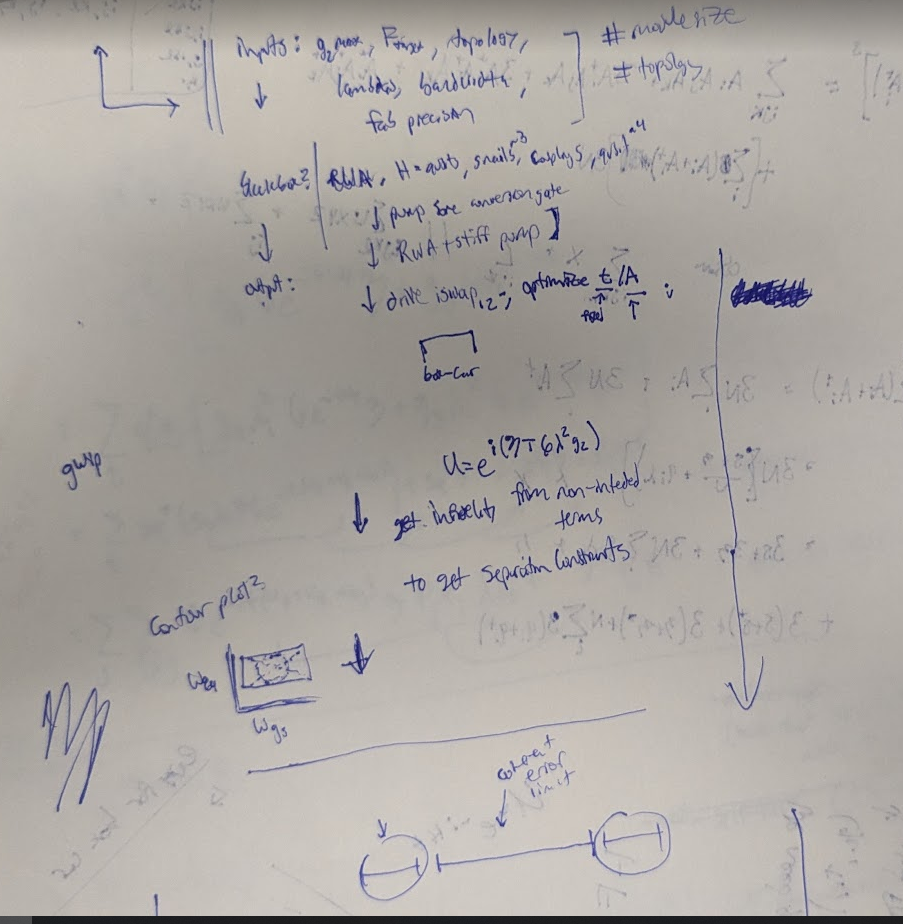


Begin with non-interacting components, each with linear and nonlinear terms.
Define a module with a single SNAIL mode and $i$ transmons.
Note to self: missing $\hbar$ everywhere :(

Linear terms:
$$
H_{0L} = \omega_s s^\dagger s + \sum_{i} \omega_i q_i^\dagger q_i
$$

Nonlinear terms:
$$
H_{NL} = g_3 (s^\dagger + s)^3 + \sum_{i} \frac{\alpha_i}{12}(q_i^\dagger + q_i)^4
$$

Coupling, note that because we are assuming $g_{qs} >> g_{ij}$, which says qubits are strongly coupled to the SNAIL mode, but qubits are weakly coupled to each other, then we can remove the cross terms between qubits and only consider the qubit-SNAIL coupling terms. This is a reasonable assumption because the tube-designs of the transmons means the electric-fields will be localized. Second, we remove (fast oscillating) non-photon number preserving terms $s^\dagger q^\dagger + s q$. We could justify this later when we get to RWA step, but for conveince in handling expressions with many terms we know to get rid of these at the start.

$$
\begin{align*}
H_{c} &= \sum_{q} g_{sq} (s^\dagger + s)(q^\dagger + q)  + \sum_{i,j} g_{ij} (q_i^\dagger + q_i)(q_j^\dagger + q_j) \\
    &\approx \sum_{q} g_{sq} (s^\dagger q + s q^\dagger)
\end{align*}
$$

Next, diagonalization using Bogoliubov transformation (there is a lot of meat here in Chao thesis about using perturbative methods in dispersive reigme, Sec.2.1.1). The goal of this transformation is to use the linear terms and couplings to describe a dressed linear system. There exists some operator $B$,
$$
H_D = B^\dagger H_{0L} B
$$
such that when solved for, diagonalizes the linear-terms
$$
\tilde{H}_{0L} = \tilde{\omega}_s s^\dagger s + \sum_{i} \tilde{\omega}_i q_i^\dagger q_i
$$
which is then also used to transform the non-linear terms:
$$
\tilde{H}_{NL} = B H_{NL} B^\dagger
$$
where (be very careful! Is '~' actually there or have I just forgot to include it?)
$$
\tilde{\omega}_x = \omega_x - \sum_y \lambda_{xy}g_{xy}
$$
and (be careful about consistency with $\Delta$ and negative sign!)
$$
\lambda_{xy} = \left (\frac{g}{\Delta}\right )_{xy}
$$

Then we will introduce an external drive pump on the SNAIL
$$
H_{\text{pump}} = \left [ \varepsilon(t) e^{-i \omega_p t} - \varepsilon^*(t) e^{+i \omega_p t} \right ](s^\dagger - s)
$$

Because we want to move the pump terms into the non-linearity, we perform a displacement transformation on the SNAIL mode,
$$
U_D = \exp{(z s^\dagger - z^* s)} \\
H_D = U_D H U_D^\dagger + i \dot{U_D} U_D^\dagger
$$,

by defining 
$$
z = \frac{\varepsilon(t)}{\omega_s - \omega_p} e^{-i \omega_p t} - \frac{\varepsilon^*(t)}{\omega_s + \omega_p} e^{+i \omega_p t}
$$

which gives us new snail mode operators that include the pump terms
$$
\begin{align*}
&\tilde{s} = U_D s U_D^\dagger = s - z \\
&\tilde{s}^\dagger = U_D s^\dagger U_D^\dagger = s^\dagger - z^*
\end{align*}
$$


Put everything together, and we need to do some simplifications (for simplicity, I drop $\lambda_{ij}$ qubit-qubit hybridization terms here, but if we deem it important can look at this more carefully)
$$
\begin{align*}
H_D &= \tilde{\omega}_s s^\dagger s + \sum_{i} \tilde{\omega}_i q_i^\dagger q_i \\
& + g_3 \left (s - z + s^\dagger - z^* + \sum_{i} \lambda_{si} (q_i^\dagger + q_i) \right )^3 \\
& + \sum_{i} \frac{\alpha_i}{12}\left (q_i^\dagger + q_i - \lambda_{si}(s - z + s^\dagger - z^*) \right )^4 \\
\end{align*}
$$

Introduce 
$$
\begin{align*}
\eta = \frac{2 \omega_p \varepsilon(t)}{\omega_p^2 - \omega_s^2}\\
\left [ -z = \eta e^{-i \omega_p t} \right ]
\end{align*}
$$

Then we can write the Hamiltonian in the form with the pump terms included in the SNAIL non-linearity
$$
\begin{align*}
H_D &= \tilde{\omega}_s s^\dagger s + \sum_{i} \tilde{\omega}_i q_i^\dagger q_i \\
&+ g_3 \left (s + s^\dagger + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t} + \sum_{i} \lambda_{si} (q_i^\dagger + q_i) \right )^3 \\
&+ \sum_{i} \frac{\alpha_i}{12} \left (q_i^\dagger + q_i + \lambda_{si}(s + s^\dagger + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t}) \right )^4
\end{align*}
$$


The final transformation is to move to the interaction-picture (rotating-frame),
$$
U_R = \exp{\left (it (\tilde{\omega}_s s^\dagger s + \sum_i \tilde{\omega}_{q_i} q_i^\dagger q_i)\right )}\\
\tilde{H}_I = U_R H_D U_R^\dagger + i \dot{U_R}U_{R}^\dagger
$$
which should have the effect of removing the linear terms $H_{0L}$ using this substitution over $s$, $q_i$:
$$
\tilde{a} = U_R a U_R^\dagger = a e^{-i \tilde{\omega}_a t}
$$
(wait why is this true? what happens to terms like $ss^\dagger$?)


thus we are left with 
$$
\begin{align*}
\tilde{H}_{NL} &= U_R H_{NL} U_R^\dagger \\

&= g_3 \left (s e^{-i \tilde{\omega}_s t} + s^\dagger e^{i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t} + \sum_{i} \lambda_{si} (q_i^\dagger e^{i \tilde{\omega}_{q_i} t} + q_i e^{-i \tilde{\omega}_{q_i} t}) \right )^3 \\

&+ \sum_{i} \frac{\alpha_i}{12} \left ( q_i^\dagger e^{i \tilde{\omega}_{q_i} t} + q_i e^{-i \tilde{\omega}_{q_i} t} - \lambda_{si}(s e^{-i \tilde{\omega}_s t} + s^\dagger e^{i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t}) \right )^4
\end{align*}
$$

from here we can identity 4 types of terms that will appear following expansion: snail/pump-self, snail/pump-qubit, qubit-self, qubit-snail/pump. recall, we choose to eliminate qubit-qubit like terms because $g_{qs} >> g_{ij}$

$$
\begin{align*}
\tilde{H}_I &= g_3 \left (s e^{-i \tilde{\omega}_s t} + s^\dagger e^{i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t} + \sum_{i} \lambda_{si} (q_i^\dagger e^{i \tilde{\omega}_{q_i} t} + q_i e^{-i \tilde{\omega}_{q_i} t}) \right )^3 \\

&+ \sum_{i} \frac{\alpha_i}{12} \left ( q_i^\dagger e^{i \tilde{\omega}_{q_i} t} + q_i e^{-i \tilde{\omega}_{q_i} t} - \lambda_{si}(s e^{-i \tilde{\omega}_s t} + s^\dagger e^{i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t}) \right )^4
\end{align*}
$$


Up to this point we have reproduced existing derivations. The final conventional step is to select a pump frequency, i.e. $\omega_p = \tilde{\omega}_1 - \tilde{\omega}_2$, if we wanted a conversion-interaction between qubits 1 and 2. By substituting in this value for $\omega_p$ we can simplify the phase-oscillating (complex exponentials) terms, followed by eliminating fast-oscillating terms (non-zero complex exponential) we get the expected $\texttt{iSWAP}$:

$$
H_\text{eff} = \eta q_1 q_2^\dagger e^0 + \eta q_1 q_3^\dagger e^{-i (\tilde{\omega}_1 - \tilde{\omega}_3)t} + \eta q_2 q_3^\dagger e^{-i (2 \tilde{\omega}_2 - \tilde{\omega}_1 - \tilde{\omega}_3)t} + \ldots
$$

Because we are interested in domain of increasingly close interaction frequencies, as to create densely connected modules, we want to assume that the qubit and snail frequencies can be very close to each other. Therefore, we should keep some of the non-zero terms (e.g. $\tilde{\omega}_1 - \tilde{\omega}_3 \approx 0$ but not $\tilde{\omega}_1 + \tilde{\omega}_3$). In other words, perform RWA as if $\forall i, \omega_s \equiv \omega_i$. The full expansion will give many terms, but we should expect to keep only some which look like $[\eta q_i q_j^\dagger, \eta s q_i^\dagger, \eta s^\dagger s]$ each with different effective rates. Of course, if done carefully, we should see the effective rates of all the terms that are normally removed at this step are small. 

after exploring a deep rabbit hole, which is boson ladder operators and normal ordering as a combinatorics problem, ready to revisit this. 

example: https://arxiv.org/pdf/quant-ph/0701185
$$
\mathcal{N}[F(a, a^\dagger, b, b^\dagger)] = F(a, a^\dagger, b, b^\dagger) = \sum_{k,l,m,n} C_{k,l,m,n} (a^\dagger)^k (b^\dagger)^l b^m a^n
$$
the main task is thus determining the coefficients $C_{k,l,m,n}$, for some function $F(a, a^\dagger, b, b^\dagger)$.

Unfortunately, dealing with expansions of ^3, and ^4 are just large enough that its not quite worthwhile to derive a fully generalized solution but still too big to do by hand. The combinatoric literature is not immediately obvious how to helpful, where I am only concerned with deriving an expression in some computationally tractable manner. 

To illuciate the complexity,

Given $\mathcal{A}$ is a function over one more more boson operators, and $\mathcal{A}$ is already normal-ordered,
$$
(\sum_i^N(A_i + A_i^\dagger))^3
$$
expands (with noncommuting multiplication to)
$$
\sum_{ijk} A_i A_j A_k + A_i A_j A_k^\dagger + A_i A_j^\dagger A_k + A_i^\dagger A_j A_k  + A_i A_j^\dagger A_k^\dagger + A_i^\dagger A_j A_k^\dagger + A_i^\dagger A_j^\dagger A_k + A_i^\dagger A_j^\dagger A_k^\dagger
$$

now given some function $Nr$ that computes the normal-ordering residual, which is $Nr[F] = \mathcal{N}[F] - :F:$, i.e. the correction-terms that are produced by normal-ordering, we can write the expansion as

$$
\begin{align*}
\sum_{ijk} & A_i A_j A_k\\
&+ 3 A_i^\dagger A_j A_k + Nr[A_i A_j A_k^\dagger]  + Nr[A_i A_j^\dagger A_k]\\
&+ 3 A_i^\dagger A_j^\dagger A_k + Nr[A_i A_j^\dagger A_k^\dagger] + Nr[A_i^\dagger A_j A_k^\dagger]\\
&+ A_i^\dagger A_j^\dagger A_k^\dagger\\
\end{align*}
$$

which is complicated because $Nr[X_i Y_j Z_k]$ depends on the indices of the operators. This requires partitioning (distinguishable operator indices into indistinguishable mode index sets?) to enumerate all the normal-ordering correction terms. Said differently, the correction term depends on whether $X,Y,Z$ are on the same mode or not.

Using linearity of sums, for $X,Y,Z \in \{A, A^\dagger\}$
$$
Nr\left [\sum_{ijk} X_i Y_j Z_j\right ] = \sum_{i} Nr \left [ X_i Y_i Z_i \right ] + \sum_{ij, i \neq j} Nr \left [ X_i Y_j Z_j \right ] +  Nr \left [X_j Y_i Z_j \right ] + Nr \left [X_j Y_j Z_i \right ]
$$
and if all terms are on separate modes, then the correction term is zero, because operators commute with each other.
$$
\sum_{ijk, i \neq j \neq k} Nr \left [X_i Y_j Z_k \right ] = 0
$$

Putting together for the full expansion of $(\sum_i^N(A_i + A_i^\dagger))^3$ we have
$$
\begin{align*}
& \sum_{ijk} A_i A_j A_k + 3 A_i^\dagger A_j A_k + 3 A_i^\dagger A_j^\dagger A_k + A_i^\dagger A_j^\dagger A_k^\dagger\\
&+ \sum_{i} Nr \left [ A_i A_i A_i^\dagger \right ] +  Nr \left [ A_i A_i^\dagger A_i \right ] + Nr \left [A_i A_i^\dagger A_i ^\dagger \right ] + Nr \left [A_i^\dagger A_i A_i ^\dagger \right ] \\
&+ \sum_{ij, i \neq j} Nr \left [A_i A_i A_j^\dagger \right ] + Nr \left [A_i A_j A_i^\dagger \right ] + Nr \left [A_j A_i A_i^\dagger \right ] \\
&+ \sum_{ij, i \neq j} Nr \left [A_i A_i^\dagger A_j \right ] + Nr \left [A_i A_j^\dagger A_i \right ] + Nr \left [A_j A_i^\dagger A_i \right ] \\
&+ \sum_{ij, i \neq j} Nr \left [A_i A_i^\dagger A_j^\dagger \right ] + Nr \left [A_i A_j^\dagger A_i^\dagger \right ] + Nr \left [A_j A_i^\dagger A_i^\dagger \right ] \\
&+ \sum_{ij, i \neq j} Nr \left [A_i^\dagger A_i A_j^\dagger \right ] + Nr \left [A_i^\dagger A_j A_i^\dagger \right ] + Nr \left [A_j^\dagger A_i A_i^\dagger \right ] \\
\end{align*}
$$

Then we should use the following property, for $i \neq j$, which is a result of boson operators on different modes always commute (proof? maybe more obvious to see why had I done the factoring before introducing the residual function...) Basic example could be $a a^\dagger b = (a^\dagger a + 1) b$ is the same had we found correction term as $Nr[a a^\dagger] = 1$ and $(Nr[a a^\dagger])b = b$, or $Nr[a a^\dagger b] =b $. 
$$
Nr[X_i Y_i Z_j] =  Nr[X_i Z_j Y_i]  = Nr[Z_j X_i Y_i] = (Nr[X_i Y_i]) Z_j
$$

second we can simplify terms that are now already ordered when considering indices, example 
$$
\begin{align*}
&\sum_{ij, i \neq j} Nr \left[A_i A_i A_j^\dagger \right] + Nr \left[A_i A_j^\dagger A_i \right]\\
&= \sum_{ij, i \neq j} \left(Nr \left[A_i A_i \right]\right) A_j^\dagger = 0
\end{align*}
$$
pull out terms that commute through the normal-ordering correction

$$
\begin{align*}
& \sum_{ijk} A_i A_j A_k + 3 A_i^\dagger A_j A_k + 3 A_i^\dagger A_j^\dagger A_k + A_i^\dagger A_j^\dagger A_k^\dagger\\
&+ \sum_{i} Nr \left [ A_i A_i A_i^\dagger \right ] +  Nr \left [ A_i A_i^\dagger A_i \right ] + Nr \left [A_i A_i^\dagger A_i ^\dagger \right ] + Nr \left [A_i^\dagger A_i A_i ^\dagger \right ] \\
&+ \sum_{ij, i \neq j} 3 (Nr \left[A_i A_i^\dagger \right]) A_j\\
\end{align*}
$$

revisiting the $\sum_i$ terms
$$
\begin{align*}
& A A A^\dagger + A A^\dagger A + A A^\dagger A^\dagger + A^\dagger A A^\dagger\\
&= 2 A^\dagger A A + 2 A^\dagger A^\dagger A + (A+2A^\dagger)Nr[A A^\dagger] + Nr[A A^\dagger](2A+A^\dagger)\\
\end{align*}
$$
finally note, reduce $Nr[A A^\dagger] = [A, A^\dagger]$

put together
$$
\begin{align*}
\left(\sum_i^N(\mathcal{A}_i + \mathcal{A}_i^\dagger)\right)^3 &=\\
& \sum_{ijk} \mathcal{A}_i \mathcal{A}_j \mathcal{A}_k + 3 \mathcal{A}_i^\dagger \mathcal{A}_j \mathcal{A}_k + 3 \mathcal{A}_i^\dagger \mathcal{A}_j^\dagger \mathcal{A}_k + \mathcal{A}_i^\dagger \mathcal{A}_j^\dagger \mathcal{A}_k^\dagger\\
&+ \sum_{i} 2 \mathcal{A}_i^\dagger \mathcal{A}_i \mathcal{A}_i + 2 \mathcal{A}_i^\dagger \mathcal{A}_i^\dagger \mathcal{A}_i + (\mathcal{A}_i+2\mathcal{A}_i^\dagger)[\mathcal{A}_i, \mathcal{A}_i^\dagger] + [\mathcal{A}_i, \mathcal{A}_i^\dagger](2\mathcal{A}_i+\mathcal{A}_i^\dagger)\\
&+ \sum_{ij, i \neq j} 3 ([\mathcal{A}_i, \mathcal{A}_i^\dagger]) \mathcal{A}_j\\
\end{align*}
$$

looks like we have it in a form we want
$$
g_3 \left (s e^{-i \tilde{\omega}_s t} + s^\dagger e^{i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t} + \sum_{i} \lambda_{si} (q_i^\dagger e^{i \tilde{\omega}_{q_i} t} + q_i e^{-i \tilde{\omega}_{q_i} t}) \right )^3\\ = g_3 \left( \sum_i \mathcal{A}_i + \mathcal{A}_i^\dagger \right)^3
$$

by defining

$$
\mathcal{A}_i = \left( \frac{s e^{-i \tilde{\omega}_s t} + \eta e^{-i \omega_p t}}{N} + \lambda_{si} q_i e^{-i \tilde{\omega}_{q_i} t} \right); \mathcal{A}_i^\dagger = \left( \frac{s^\dagger e^{i \tilde{\omega}_s t} + \eta^* e^{i \omega_p t}}{N} + \lambda_{si} q_i^\dagger e^{i \tilde{\omega}_{q_i} t} \right)
$$

and the commutator term is
$$
[\mathcal{A}_i, \mathcal{A}_i^\dagger] = \frac{1}{N^2} +  \lambda_{si}^2
$$



now that we know the commutator is a scalar, we can simplify out some more terms

WIP: XXX something about this last term makes me think there is a mistake, not sure yet

$$
\begin{align*}
\left(\sum_{i=1}^N(\mathcal{A}_i + \mathcal{A}_i^\dagger)\right)^3 &= \sum_{ijk} \mathcal{A}_i \mathcal{A}_j \mathcal{A}_k + 3 \mathcal{A}_i^\dagger \mathcal{A}_j \mathcal{A}_k + 3 \mathcal{A}_i^\dagger \mathcal{A}_j^\dagger \mathcal{A}_k + \mathcal{A}_i^\dagger \mathcal{A}_j^\dagger \mathcal{A}_k^\dagger\\
&+ \sum_{i=1}^N \left( 2 \mathcal{A}_i^\dagger \mathcal{A}_i \mathcal{A}_i + 2 \mathcal{A}_i^\dagger \mathcal{A}_i^\dagger \mathcal{A}_i + 3 [\mathcal{A}, \mathcal{A}^\dagger] (\mathcal{A}_i + \mathcal{A}_i^\dagger) \right) \\
& + 3(N-1)[\mathcal{A}, \mathcal{A}^\dagger] \sum_{i=1}^N \mathcal{A}_i
\end{align*}

Given interaction-picture Hamiltonian

$$
\begin{align*}
\tilde{H}_I &= g_3 \left (s e^{-i \tilde{\omega}_s t} + s^\dagger e^{i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t} + \sum_{i} \lambda_{si} (q_i^\dagger e^{i \tilde{\omega}_{q_i} t} + q_i e^{-i \tilde{\omega}_{q_i} t}) \right )^3 \\

&+ \sum_{i} \frac{\alpha_i}{12} \left ( q_i^\dagger e^{i \tilde{\omega}_{q_i} t} + q_i e^{-i \tilde{\omega}_{q_i} t} - \lambda_{si}(s e^{-i \tilde{\omega}_s t} + s^\dagger e^{i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} + \eta^* e^{i \omega_p t}) \right )^4
\end{align*}
$$

define normal-ordered substitution operators

$$
\mathcal{A}_i = \left( \frac{s e^{-i \tilde{\omega}_s t} + \eta e^{-i \omega_p t}}{N} + \lambda_{si} q_i e^{-i \tilde{\omega}_{q_i} t} \right)
$$

$$
\mathcal{A}_i^\dagger = \left( \frac{s^\dagger e^{i \tilde{\omega}_s t} + \eta^* e^{i \omega_p t}}{N} + \lambda_{si} q_i^\dagger e^{i \tilde{\omega}_{q_i} t} \right)
$$

$$
\mathcal{B}_i = q_i e^{-i \tilde{\omega}_{q_i} t} - \lambda_{si} \left( s e^{-i \tilde{\omega}_s t} + \eta e^{-i \omega_p t} \right)
$$

$$
\mathcal{B}_i^\dagger = q_i^\dagger e^{i \tilde{\omega}_{q_i} t} - \lambda_{si} \left( s^\dagger e^{i \tilde{\omega}_s t} + \eta^* e^{i \omega_p t} \right)
$$

which gives us easier to handle terms

$$
\begin{align*}
\tilde{H}_I &= g_3 \left( \sum_{i} (\mathcal{A}_i + \mathcal{A}_i^\dagger) \right)^3 + \sum_{i} \frac{\alpha_i}{12} \left( \mathcal{B}_i + \mathcal{B}_i^\dagger \right)^4
\end{align*}
$$

we can now expand the terms using a combination of the binomial theorem and normal-ordering correction terms
$$
\begin{align*}
\tilde{H}_I &= \\

&g_3 \left(\sum_{i,j,k} \left(\mathcal{A}_i \mathcal{A}_j \mathcal{A}_k + 3 \mathcal{A}_i^\dagger \mathcal{A}_j \mathcal{A}_k + 3 \mathcal{A}_i^\dagger \mathcal{A}_j^\dagger \mathcal{A}_k + \mathcal{A}_i^\dagger \mathcal{A}_j^\dagger \mathcal{A}_k^\dagger\right) + 3n \sum_i (\mathcal{A}_i + \mathcal{A}_i^\dagger)\right)\\

&+ \sum_{i} \frac{\alpha_i}{12} \left(\mathcal{B}_i \mathcal{B}_i \mathcal{B}_i \mathcal{B}_i + 4 \mathcal{B}_i^\dagger \mathcal{B}_i \mathcal{B}_i \mathcal{B}_i + 6 \mathcal{B}_i^\dagger \mathcal{B}_i^\dagger \mathcal{B}_i \mathcal{B}_i + 4 \mathcal{B}_i^\dagger \mathcal{B}_i^\dagger \mathcal{B}_i^\dagger \mathcal{B}_i + \mathcal{B}_i^\dagger \mathcal{B}_i^\dagger \mathcal{B}_i^\dagger \mathcal{B}_i^\dagger \right.

\left. + 3 + 6 (\mathcal{B}_i \mathcal{B}_i) + 6 (\mathcal{B}_i^\dagger \mathcal{B}_i^\dagger) + 12 (\mathcal{B}_i^\dagger \mathcal{B}_i)\right)
\end{align*}
$$

Following a selective-RWA and removing constants, I get a lot of terms: (todo put back tildes)

$$
\begin{align*}
\frac{\mathcal{H}}{\hbar} = \sum_{i=1}^{\text{N}} \Bigg[&\\

&\sum_{\substack{j=1 \\ j \neq i}}^{\text{N}} 
\mathbf{q_i^\dagger q_j} \left( 6 \eta g_3 \lambda_i \lambda_j e^{-i t (-\omega_{q_i} + \omega_{q_j} + \omega_p)} 
+ 6 g_3 \eta^* \lambda_i \lambda_j e^{i t (\omega_{q_i} - \omega_{q_j} + \omega_p)} \right)\\

&+ \mathbf{q_i^\dagger q_i} 
\left( \alpha_i 
+ 6 g_3 \eta^* \lambda_i^2 e^{i t \omega_p}
+ 6 g_3 \eta \lambda_i^2 e^{-i t \omega_p}
+ 2 \eta \eta^* \alpha_i \lambda_i^2 
+ \left(\eta^*\right)^2 \alpha_i \lambda_i^2 e^{2 i t \omega_p}
+ \eta^2 \alpha_i \lambda_i^2 e^{-2 i t \omega_p} \right) \\

&+ \mathbf{s^\dagger s} 
\left( 6 g_3 \left( \eta e^{-i t \omega_p} + \eta^* e^{i t \omega_p} \right) / N
+ \alpha_i \lambda_i^2 
+ 2 \eta \eta^* \alpha_i \lambda_i^4 
+ \left(\eta^*\right)^2 \alpha_i \lambda_i^4 e^{2 i t \omega_p}
+ \eta^2 \alpha_i \lambda_i^4 e^{-2 i t \omega_p} \right) \\
   
&+ \mathbf{s^\dagger s^\dagger s s} \left(\frac{1}{2} \alpha_i \lambda_i^4 \right) \\

&+ \mathbf{q_i^\dagger q_i^\dagger q_i q_i} \left(\frac{1}{2} \alpha_i \right) \\

&+ \mathbf{s^\dagger s q_i^\dagger q_i} (2 \alpha _i \lambda _i^2)\\

&+ \mathbf{s q_i^\dagger} 
\left(
   6 g_3 \eta  \lambda _i e^{-i t \left(-\omega_{q_i}+\omega _p+\omega _s\right)}
   + 6 g_3 \eta ^* \lambda _i e^{i t \left(\omega _{q_i}+\omega _p-\omega _s\right)}
   -\alpha _i \lambda _i e^{-i t \left(\omega _s-\omega _{q_i}\right)}
   -\eta ^2 \alpha _i \lambda _i^3 e^{-i t \left(-\omega _{q_i}+2 \omega_p+\omega _s\right)}
   -\left(\eta^*\right)^2 \alpha _i \lambda _i^3 e^{i t \left(\omega _{q_i}+2 \omega _p-\omega _s\right)}
   -2 \eta  \eta ^* \alpha_i \lambda _i^3 e^{-i t \left(\omega _s-\omega _{q_i}\right)}
\right)\\

&+ \mathbf{s^\dagger q_i}
\left(
   6 g_3 \eta ^* \lambda _i e^{i t \left(-\omega _{q_i}+\omega _p+\omega_s\right)}
   + 6 \eta  g_3 \lambda _i e^{-i t\left(\omega _{q_i}+\omega _p-\omega _s\right)}
   -\alpha _i \lambda _i e^{i t \left(\omega _s-\omega _{q_i}\right)}
   -\eta ^2 \alpha _i \lambda _i^3 e^{-i t \left(\omega _{q_i}+2\omega _p-\omega _s\right)}
   -\left(\eta ^*\right)^2 \alpha _i \lambda _i^3 e^{i t \left(-\omega _{q_i}+2 \omega _p+\omega _s\right)}
   -2\eta  \eta ^* \alpha _i \lambda _i^3 e^{i t \left(\omega _s-\omega _{q_i}\right)}
\right)\\

&+\mathbf{s s q_i^\dagger q_i^\dagger} \left(\frac{1}{2} \alpha_i \lambda_i^2 e^{-2 i t (\omega_s - \omega_{q_i})} \right) + \mathbf{s^\dagger s^\dagger q_i q_i} \left(\frac{1}{2} \alpha_i \lambda_i^2 e^{2 i t (\omega_s - \omega_{q_i})} \right)\\

&+\mathbf{s^\dagger s s q_i^\dagger} \left(- \alpha_i \lambda_i^3 e^{-i t (\omega_s - \omega_{q_i})} \right)
+\mathbf{s^\dagger s^\dagger s q_i} \left(- \alpha_i \lambda_i^3 e^{i t (\omega_s - \omega_{q_i})} \right)
+\mathbf{s^\dagger q_i^\dagger q_i q_i} \left(- \alpha_i \lambda_i e^{i t (\omega_s - \omega_{q_i})} \right)
+\mathbf{s q_i^\dagger q_i^\dagger q_i} \left(- \alpha_i \lambda_i e^{-i t (\omega_s - \omega_{q_i})} \right) \Bigg]

\end{align*}
$$


In order to convert to design constraints, we need to do some worst-case error budgeting.
Introduce new variables, $\delta_x$, which are the minimum separations between the desired interaction term and: a qubit-other difference, an other-other difference, and a qubit-snail difference. The desired interaction is defined on qubits 1 and 2, so we can call others as qubtit3, qubit4, and SNAIL.

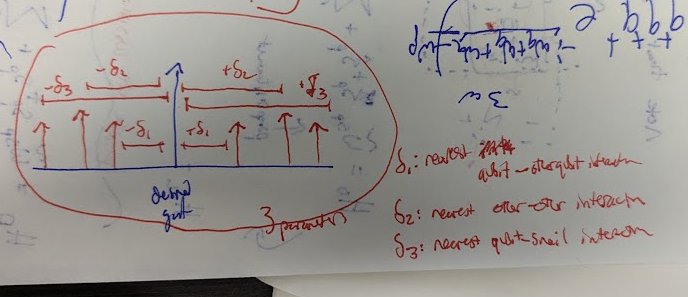


The idea is that with more qubits in a module the error budget constraint won't change much. The constraint is still over the nearest-neighbors, and because all neighbors have to satisfy the same constraints, we can model error with only few qubits. Then we can see that with more qubits, it becomes increasingly difficult or infeasible to simultaneously satisfy all the constraints.

Moreover, with the following worst-case substitution, if I assume that all neighboring interactions are the same distance away, this is an overestimate of the error, because if this was true then the neighbors themselves would not satisfy separation constraints. Therefore, we limit to 4 qubits and the SNAIL mode, which allows us to have enough qubits for nearest-neighbor interaction terms (on qubits 3 and qubits 4) with a reasonable assumption of worst-case.

Worst-case substitutions, if I enumerate the $e^{ixt}$ terms, I see
$$
\begin{align*}
&\omega_{q_i} - \omega_{q_j} \pm  \omega_p\\
&\pm \omega_p \\
&\pm 2 \omega_p \\
&\omega_{q_i} - \omega_s \pm \omega_p\\
&\omega_s-\omega_{q_i}\\
&\omega_s-\omega_{q_i} \pm 2\omega_p\\
\end{align*}
$$

this is tricky because we know all of these are non-zero except for $\omega_{q_2} - \omega_{q_1} - \omega_p$. Observe that for each $\pm$, only one can tend towards 0. It's confusing, for example, if I have 3 qubits, $\omega_p= \Delta_{12}$ and $\omega_3 = \omega_2 + \delta$ then I have $w3-w1-wp = w_3-w_1-w_2+w_1 = w_3-w_2 = \delta$ but also $w3-w1+wp = w_3-w_1+w_2-w_1 = w_3+w_2 - 2w_1$ and I'm not sure what to call this term. Is it also on the order of $\delta$?

I think I will define 3 variables, which we will want to learn.
$\delta_p$ is separation between the interacting qubits, in our small model this is $abs(\omega_{q_2} - \omega_{q_1})$.
$\delta_s$ is separation between any qubit and the SNAIL mode, in our small model this is $abs(\omega_s - \omega_{q_i})$.
$\delta{q}$ is the separation between a gate qubit and a non-gate qubit, in our small model this is $abs(\omega_{q_x} - \omega_{q_{1,2}})$.

$$
\mathcal{H}/\hbar = H_\text{desired} + H_\text{coherent-error}
$$

Let's now assume, that $\eta$ is real by defining simple pulse shapes, and that $\lambda_{si} = \lambda_i$ for all $i$.

$$
H_\text{desired}/\hbar = \mathbf{q_1^\dagger q_2} \left( 6 \eta g_3 \lambda^2 + 6 g_3 \eta \lambda^2 e^{i t 2 \delta_p} \right) + \mathbf{q_1 q_2^\dagger} \left( 6 \eta g_3 \lambda^2 + 6 g_3 \eta \lambda^2 e^{-i t 2 \delta_p} \right)\\
$$


$$
\begin{align*}

H_\text{error}/\hbar = \sum_{i=1}^{\text{4}} \Bigg[

&\sum_{\substack{j=1 \\ j \neq i, (i,j)\neq \{1,2\}}}^{\text{N}} 
\mathbf{q_i^\dagger q_j} \left( 6 \eta g_3 \lambda_i \lambda_j e^{-i t (-\omega_{q_i} + \omega_{q_j} + \omega_p)} 
+ 6 g_3 \eta^* \lambda_i \lambda_j e^{i t (\omega_{q_i} - \omega_{q_j} + \omega_p)} \right)\\

&+ \mathbf{q_i^\dagger q_i} 
\left( \alpha_i 
+ 6 g_3 \eta^* \lambda_i^2 e^{i t \omega_p}
+ 6 g_3 \eta \lambda_i^2 e^{-i t \omega_p}
+ 2 \eta \eta^* \alpha_i \lambda_i^2 
+ \left(\eta^*\right)^2 \alpha_i \lambda_i^2 e^{2 i t \omega_p}
+ \eta^2 \alpha_i \lambda_i^2 e^{-2 i t \omega_p} \right) \\

&+ \mathbf{s^\dagger s} 
\left( 6 g_3 \left( \eta e^{-i t \omega_p} + \eta^* e^{i t \omega_p} \right) / N
+ \alpha_i \lambda_i^2 
+ 2 \eta \eta^* \alpha_i \lambda_i^4 
+ \left(\eta^*\right)^2 \alpha_i \lambda_i^4 e^{2 i t \omega_p}
+ \eta^2 \alpha_i \lambda_i^4 e^{-2 i t \omega_p} \right) \\
   
&+ \mathbf{s^\dagger s^\dagger s s} \left(\frac{1}{2} \alpha_i \lambda_i^4 \right) \\

&+ \mathbf{q_i^\dagger q_i^\dagger q_i q_i} \left(\frac{1}{2} \alpha_i \right) \\

&+ \mathbf{s^\dagger s q_i^\dagger q_i} (2 \alpha _i \lambda _i^2)\\

&+ \mathbf{s q_i^\dagger} 
\left(
   6 g_3 \eta  \lambda _i e^{-i t \left(-\omega_{q_i}+\omega _p+\omega _s\right)}
   + 6 g_3 \eta ^* \lambda _i e^{i t \left(\omega _{q_i}+\omega _p-\omega _s\right)}
   -\alpha _i \lambda _i e^{-i t \left(\omega _s-\omega _{q_i}\right)}
   -\eta ^2 \alpha _i \lambda _i^3 e^{-i t \left(-\omega _{q_i}+2 \omega_p+\omega _s\right)}
   -\left(\eta^*\right)^2 \alpha _i \lambda _i^3 e^{i t \left(\omega _{q_i}+2 \omega _p-\omega _s\right)}
   -2 \eta  \eta ^* \alpha_i \lambda _i^3 e^{-i t \left(\omega _s-\omega _{q_i}\right)}
\right)\\

&+ \mathbf{s^\dagger q_i}
\left(
   6 g_3 \eta ^* \lambda _i e^{i t \left(-\omega _{q_i}+\omega _p+\omega_s\right)}
   + 6 \eta  g_3 \lambda _i e^{-i t\left(\omega _{q_i}+\omega _p-\omega _s\right)}
   -\alpha _i \lambda _i e^{i t \left(\omega _s-\omega _{q_i}\right)}
   -\eta ^2 \alpha _i \lambda _i^3 e^{-i t \left(\omega _{q_i}+2\omega _p-\omega _s\right)}
   -\left(\eta ^*\right)^2 \alpha _i \lambda _i^3 e^{i t \left(-\omega _{q_i}+2 \omega _p+\omega _s\right)}
   -2\eta  \eta ^* \alpha _i \lambda _i^3 e^{i t \left(\omega _s-\omega _{q_i}\right)}
\right)\\

&+\mathbf{s s q_i^\dagger q_i^\dagger} \left(\frac{1}{2} \alpha_i \lambda_i^2 e^{-2 i t (\omega_s - \omega_{q_i})} \right) + \mathbf{s^\dagger s^\dagger q_i q_i} \left(\frac{1}{2} \alpha_i \lambda_i^2 e^{2 i t (\omega_s - \omega_{q_i})} \right)\\

&+\mathbf{s^\dagger s s q_i^\dagger} \left(- \alpha_i \lambda_i^3 e^{-i t (\omega_s - \omega_{q_i})} \right)
+\mathbf{s^\dagger s^\dagger s q_i} \left(- \alpha_i \lambda_i^3 e^{i t (\omega_s - \omega_{q_i})} \right)
+\mathbf{s^\dagger q_i^\dagger q_i q_i} \left(- \alpha_i \lambda_i e^{i t (\omega_s - \omega_{q_i})} \right)
+\mathbf{s q_i^\dagger q_i^\dagger q_i} \left(- \alpha_i \lambda_i e^{-i t (\omega_s - \omega_{q_i})} \right) \Bigg]

\end{align*}
$$


$$
\begin{align*}
&+ \mathbf{s q_i^\dagger} 
\left(
   6 g_3 \eta  \lambda _i e^{-i t \left(-\omega_{q_i}+\omega _p+\omega _s\right)}
   + 6 g_3 \eta ^* \lambda _i e^{i t \left(\omega _{q_i}+\omega _p-\omega _s\right)}
   -\alpha _i \lambda _i e^{-i t \left(\omega _s-\omega _{q_i}\right)}
   -\eta ^2 \alpha _i \lambda _i^3 e^{-i t \left(-\omega _{q_i}+2 \omega_p+\omega _s\right)}
   -\left(\eta^*\right)^2 \alpha _i \lambda _i^3 e^{i t \left(\omega _{q_i}+2 \omega _p-\omega _s\right)}
   -2 \eta  \eta ^* \alpha_i \lambda _i^3 e^{-i t \left(\omega _s-\omega _{q_i}\right)}
\right)\\

&+ \mathbf{s^\dagger q_i}
\left(
   6 g_3 \eta ^* \lambda _i e^{i t \left(-\omega _{q_i}+\omega _p+\omega_s\right)}
   + 6 \eta  g_3 \lambda _i e^{-i t\left(\omega _{q_i}+\omega _p-\omega _s\right)}
   -\alpha _i \lambda _i e^{i t \left(\omega _s-\omega _{q_i}\right)}
   -\eta ^2 \alpha _i \lambda _i^3 e^{-i t \left(\omega _{q_i}+2\omega _p-\omega _s\right)}
   -\left(\eta ^*\right)^2 \alpha _i \lambda _i^3 e^{i t \left(-\omega _{q_i}+2 \omega _p+\omega _s\right)}
   -2\eta  \eta ^* \alpha _i \lambda _i^3 e^{i t \left(\omega _s-\omega _{q_i}\right)}
\right)\\
\end{align*}
$$

In [58]:
import numpy as np
from qutip import destroy, basis, tensor, qeye
from weylchamber import c1c2c3

q = destroy(2)
q1 = tensor(q, qeye(2))
q2 = tensor(qeye(2), q)
q1dag = q1.dag()
q2dag = q2.dag()


(-1j * np.pi / 2 * (q1 * q2dag + q1dag * q2)).expm()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

  0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'infidelity')

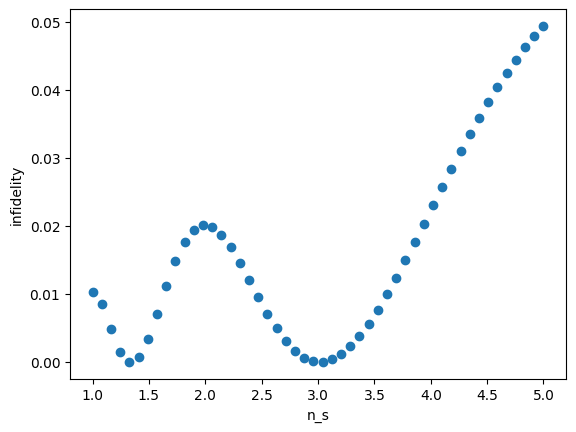

In [215]:
import numpy as np
from qutip import destroy, basis, tensor, qeye
from qutip import process_fidelity, average_gate_fidelity
from tqdm.notebook import tqdm

N = 50

# define qutip ladder operators
q = destroy(2)
q1 = tensor(q, qeye(2), qeye(2), qeye(2))
q2 = tensor(qeye(2), q, qeye(2), qeye(2))
q3 = tensor(qeye(2), qeye(2), q, qeye(2))
q4 = tensor(qeye(2), qeye(2), qeye(2), q)
q1dag = q1.dag()
q2dag = q2.dag()
q3dag = q3.dag()
q4dag = q4.dag()

# full_pulse = geff * t_f => geff = full_pulse / t_f
full_pulse = np.pi / 2  # pi/2 pulse for iSWAP, pi/4 for sqrtiSWAP
# target_time_list = 1e-9 * np.linspace(50, 300, N)  # reasonable gate times, [50ns, 300ns]
n_s_list = np.linspace(1, 5, N)  # sqrt of pump phonton number in SNAIL mode
delta_list = 1e6 * np.linspace(50, 400, 5)  # MHz
fidelity_list = []
g_eff_list = []

# params
g3 = 60e6  # (g3 = 60 Mhz / 2pi)
lambdaq = 0.1

for delta in tqdm(delta_list):
    for n_s in n_s_list:
        eta = np.sqrt(n_s)
        g_eff = 6 * eta * g3 * (lambdaq**2)
        t_f = full_pulse / g_eff

        # H(t) = g_eff * exp(-i * delta * t) * interaction_term
        # Define interaction term q3^\dagger q4 + q3 q4^\dagger
        interaction_term = q1.dag() * q2 + q1 * q2.dag()
        spectator_term = q3.dag() * q4 + q3 * q4.dag()

        # Integral of the exponential factor
        integral_term = 2 * np.sin(t_f * delta / 2) / delta

        # Time evolution operator U(t_f)
        U_t_f = (
            1j * g_eff * (t_f * interaction_term + integral_term * spectator_term)
        ).expm()
        if not U_t_f.iscptp:
            print("Not CPTP")
            break

        target_iswap = tensor(ISWAP([0, 1]).get_compact_qobj(), qeye([2, 2]))
        fidelity = 1 - process_fidelity(U_t_f, target_iswap)
        # print(f"g={g_eff}, fidelity={fidelity}")
        g_eff_list.append(g_eff)
        fidelity_list.append(fidelity)

import matplotlib.pyplot as plt

plt.plot(n_s_list, fidelity_list, "o")
plt.xlabel("n_s")
plt.ylabel("infidelity")

# # plot y-axis geff, x-axis delta, color infidelity
# X, Y = np.meshgrid(delta_list, n_s_list)
# Z = np.array(fidelity_list).reshape(len(n_s_list), len(delta_list))
# plt.contourf(X, Y, Z)
# plt.colorbar()
# plt.xlabel("Delta")
# plt.ylabel("n_s")
# plt.title("fidelity")

  0%|          | 0/8 [00:00<?, ?it/s]

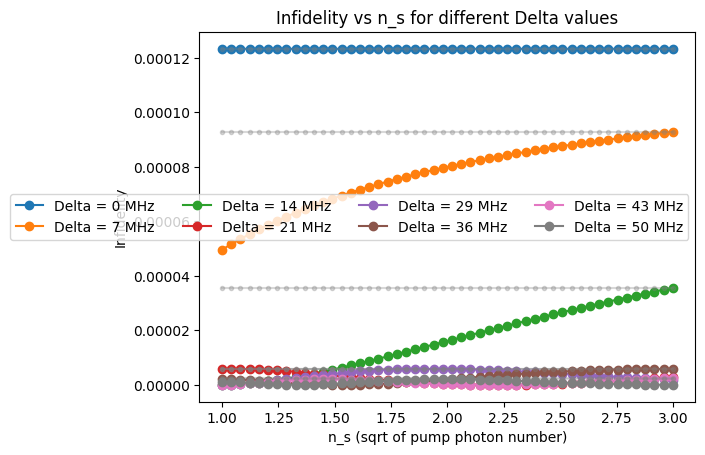

In [247]:
import numpy as np
from qutip import destroy, tensor, qeye, process_fidelity
from qutip_qip.operations import ISWAP
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

N = 50

# define qutip ladder operators
q = destroy(2)
q1 = tensor(q, qeye(2), qeye(2), qeye(2))
q2 = tensor(qeye(2), q, qeye(2), qeye(2))
q3 = tensor(qeye(2), qeye(2), q, qeye(2))
q4 = tensor(qeye(2), qeye(2), qeye(2), q)
q1dag = q1.dag()
q2dag = q2.dag()
q3dag = q3.dag()
q4dag = q4.dag()

# full_pulse = geff * t_f => geff = full_pulse / t_f
full_pulse = np.pi / 2  # pi/2 pulse for iSWAP, pi/4 for sqrtiSWAP
n_s_list = np.linspace(1, 3, N)  # sqrt of pump photon number in SNAIL mode
delta_list = 1e6 * np.linspace(0.1, 50, 8)  # MHz
fidelity_dict = {}  # to store fidelity values for each delta
g_eff_list = []

# params
g3 = 60e6  # (g3 = 60 Mhz / 2pi)
lambdaq = 0.1

for delta in tqdm(delta_list):
    fidelity_list = []
    for n_s in n_s_list:
        eta = np.sqrt(n_s)
        g_eff = 6 * eta * g3 * (lambdaq**2)
        t_f = full_pulse / g_eff

        # H(t) = g_eff * exp(-i * delta * t) * interaction_term
        # Define interaction term q1^\dagger q2 + q1 q2^\dagger
        interaction_term = q1dag * q2 + q1 * q2dag
        spectator_term = q3dag * q4 + q3 * q4dag

        # Integral of the exponential factor
        integral_term = 2 * np.sin(t_f * delta / 2) / delta

        # Time evolution operator U(t_f)
        U_t_f = (
            1j
            * g_eff
            * (t_f * interaction_term + integral_term * (lambdaq**2) * spectator_term)
        ).expm()

        # Define the target iSWAP gate
        target_iswap = tensor(ISWAP([0, 1]).get_compact_qobj(), qeye([2, 2]))

        # Fidelity calculation
        fidelity = 1 - process_fidelity(U_t_f, target_iswap)
        fidelity_list.append(fidelity)
        g_eff_list.append(g_eff)

    # Store fidelity list for current delta
    fidelity_dict[delta] = fidelity_list

# Plotting fidelity as a function of n_s for each delta
for delta, fidelity_list in fidelity_dict.items():
    plt.plot(n_s_list, fidelity_list, label=f"Delta = {delta/1e6:.0f} MHz", marker="o")
    plt.plot(
        n_s_list,
        len(fidelity_list) * [np.max(fidelity_list)],
        marker=".",
        color="gray",
        alpha=0.3,
    )


plt.xlabel("n_s (sqrt of pump photon number)")
plt.ylabel("Infidelity")
plt.title("Infidelity vs n_s for different Delta values")
plt.legend(ncols=len(fidelity_dict) / 2)
plt.show()

In [199]:
import numpy as np
from qutip import destroy, basis, tensor, qeye
from qutip import process_fidelity, average_gate_fidelity
from tqdm.notebook import tqdm


q = destroy(2)
q1 = tensor(q, qeye(2))
q2 = tensor(qeye(2), q)

interaction_term = q1.dag() * q2 + q1 * q2.dag()

# H(t) = g_eff * exp(-i * delta * t) * interaction_term
# delta = 5.2525
delta = 100
geff = np.pi / 2
t_f = 1

# U(t) = exp(-i * int_{-t/2}^{t/2} H(t') dt')
integral_term = 2 * np.sin(t_f * delta / 2) / delta
U_t_f = (-1j * geff * integral_term * interaction_term).expm()
U_t_f

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.99996603+0.j         0.        +0.00824266j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.00824266j 0.99996603+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]

In [176]:
from qutip_qip.operations import ISWAP

target_iswap = tensor(ISWAP([0, 1]).get_compact_qobj(), qeye([2, 2]))
average_gate_fidelity(U_t_f, target_iswap)

TypeError: Dimensions of oper and target do not match

In [138]:
process_fidelity(U_t_f, target_iswap)

1.0001657874439356

I can't figure out the best way to translate this into worst-case error budget analysis.
I don't want to have to know the frequencies ahead of time, instead can I translate it into say $\Delta$, qubit differences, or $\delta$ separation between differences? I was thinking that if I was putting in the form of this worst-case then the way I currently have it set up is going to overestimate the error because it will treat all terms present as equally contributing to error. Maybe alright - but instead I could isolate the nearest interaction frequencies, but then this is hard to generalize still. Because I don't know if the nearest interaction frequencies are on unique pairs of qubits of partially the same as the intended qubits, or between qubit-snails etc. 

Perhaps I define a handful of constants, given a gate between qubits 1 and 2. Then I still have N qubits. I can write a set of nearest interaction terms (+/-), separation to unique qubit-qubit difference term, separation to qubit-snail term, and separation to a qubit1-qubitx, qubit2-qubity term(?). Maybe I am wrong, but I think qubit1-qubitx is less bad than qubitx-qubity because at least some of the information is still being swapped to the correct qubit...but garbage in garbage out might apply.

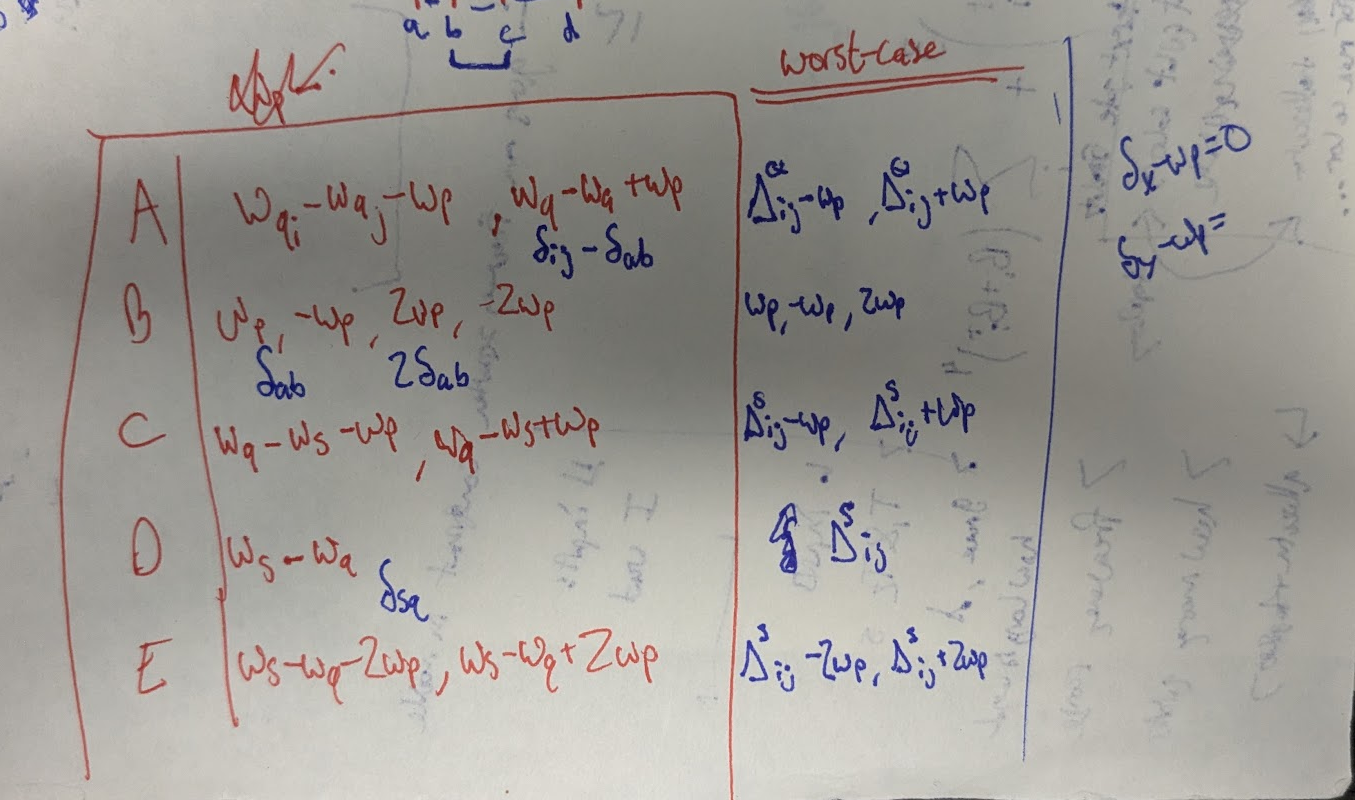

Assumptions, limitations of our model:
- that we flux tune snail to have no fourth-order nonlinearity
- pulse shapes have non-zero width spectral components
- ideal transmon nonlineality
- fab precison of target couplings,frequencies
- we are keeping some slow-rotating terms but we are not keeping all terms
- *for now*, I am assuming stark-shift is small, because I am having trouble defining what I expect an updated definition of $\omega_p$ should be, if I know pump will shift around qubit frequencies. I need further discussion on this point. But for our initial model of intrinsic error budgeting we can assume we don't correct for this.
  

for the nearest-neighbor model:
- assume that couplings between snails is small, this helps a ton because if each snail only see its own modules qubit then we have more straightforward hybridization model
- again for simplicity we assume that all qubit-snail couplings are identical, lambda_i = lambda
- BIG if multiple snails are pumped at same time then we have multiple pump displacments and things get confusing, for our initial model we are going to assume the neighboring snail drives are small and are only acting as small coherent error correction pulses; but for a practical architectue we would want to verify that constraints allow for simulatenous gates


next step: nearest-neighbor model

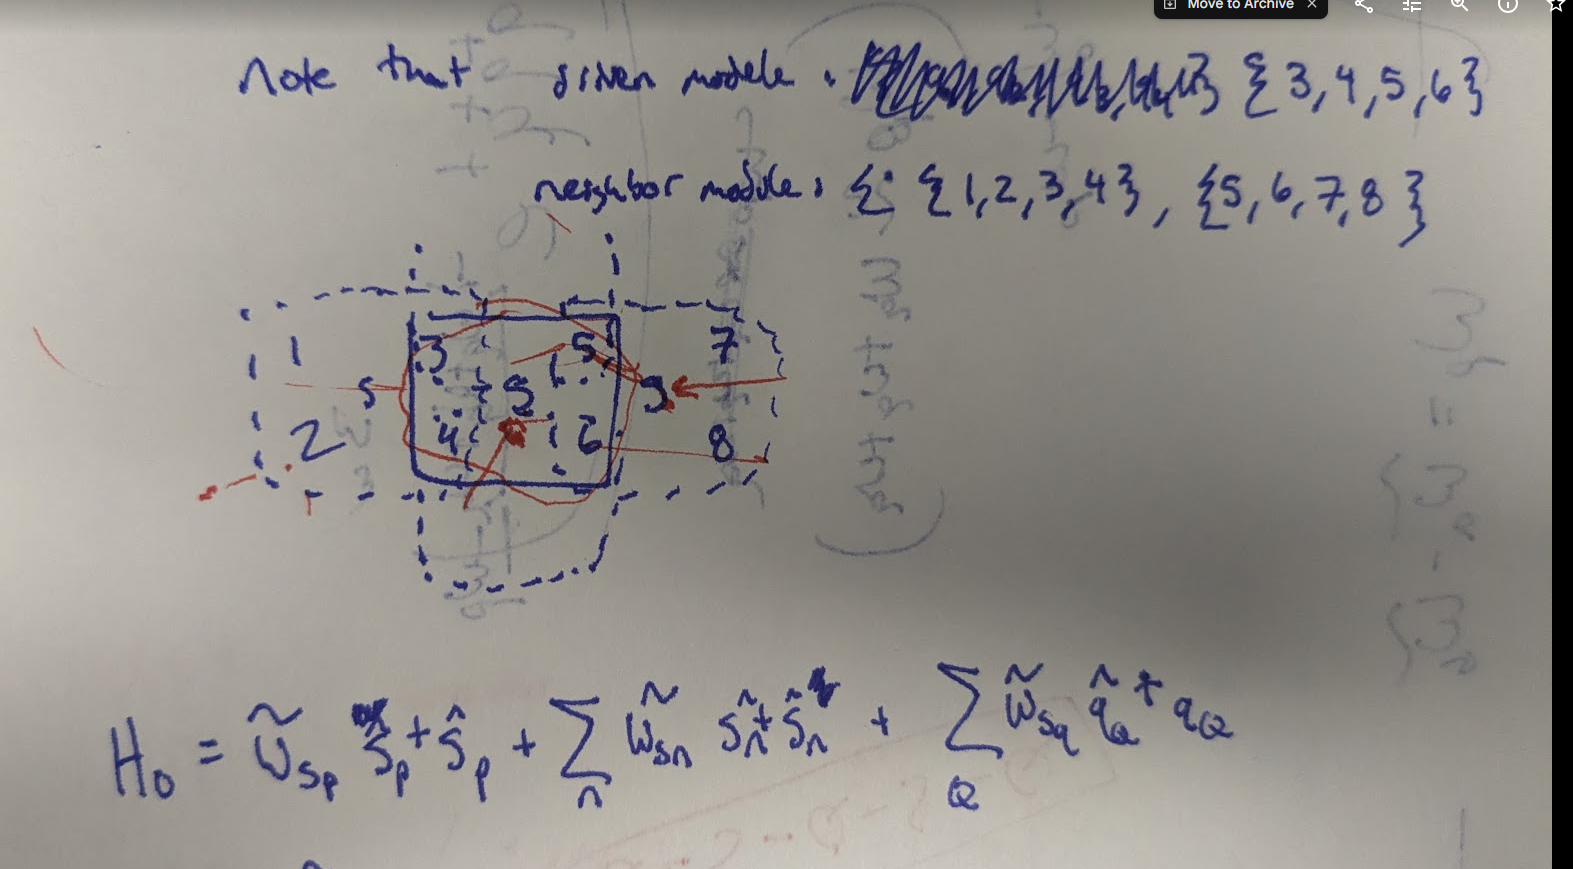
- now we have lambda^2 terms for conversion in the module, but also lambda^4, lambda^6 for gates half in module and gates in neighbor module. the most important question to answer is how many versions of the module do we need? if a module's neighbor is a copy of its qubit frequencies than I know my pump frequency will try to active gates in the neighbors, so the question is that is the hybridization through qubit-snail-qubit path enough to shrink prefactor of those terms.

- this is much harder to do with the full analytics, the primary reason being that qubits are shared between modules. 
Note that in the extended version, which includes nearest-neighbor SNAIL modules we actually have 3 more types of terms. 1. original module snail to neighbor snail coupling, which we think should be small but this is likely the most imporant term to include if trying to be more accurate. 2. module qubit to neighbor qubit, this is a weak term, not only have we already said it was  fair to consider module-qubit to other module qubit couplings to be a neglible term, this will be even more true if they are in separate modules, depending on how you notate the qubit indices you would need to only include terms that are qubits in the nieghbor module that are unique to neighbor (obviously dont want to include qubit-qubit for the qubit that is shared between the two modules), 3. the neighbor modules qubit-snail coupling. this ends up being identical to terms we already are keeping from the original module proper, the difference being is that the neighbor snail is not going to be pumped on - again being careful with qubit indices, probably worth separating this into cases where the neighbor modules qubit-snail are/are not with a qubit that is also in the original module. this will be what differentiates between lambda^4 and lambda^6 terms. recall, if we end up keeping snail-snail terms then you would want mutual hybridization to take place through 2 different routes, one is qubit-snail-qubit-snail alternating, and if snail-snail is big enough you could take shortcut and do qubit-snail-snail qubit. these are two ways you could have qubitN-qubitM coupling terms.


Notation should be improved, but I am using m to denote pumped module, and n to denote set of neighboring modules.
$$
\begin{align*}
H_{c} &= \sum_{i_m} g_{s_m, q_{i_m}} (s_m^\dagger q_{i_m} + s_m q_{i_m}^\dagger)\\
&+ \sum_{i_m, j_m} g_{q_{i_m}, q_{j_m}} (q_{i_m}^\dagger q_{j_m} + q_{i_m} q_{j_m}^\dagger)\\
&+ \sum_{n} g_{s_m, s_n} (s_m^\dagger s_{n} + s_m s_{n}^\dagger)\\
&+ \sum_{n} \sum_{i_n} g_{s_n, q_{i_n}} (s_n^\dagger q_{i_n} + s_n q_{i_n}^\dagger) \\
&+ \sum_{n} \sum_{i_n, j_n} g_{q_{i_n}, q_{j_n}} (q_{i_n}^\dagger q_{j_n} + q_{i_n} q_{j_n}^\dagger)\\
&+ \ldots
\end{align*}
$$
and this could continue with coupling terms, i.e. module snail- neighbor qubits, and second nearest neighbors of course, but we are already stretching the total terms worth considering.

$$
\begin{align*}
H_{c} &\approx \sum_{i_m} g_{s_m, q_{i_m}} (s_m^\dagger q_{i_m} + s_m q_{i_m}^\dagger)\\
&+ \sum_{n} \sum_{i_n} g_{s_n, q_{i_n}} (s_n^\dagger q_{i_n} + s_n q_{i_n}^\dagger)
\end{align*}
$$
we have to be very careful with this notation - because the set of qubits in m and n are not disjoint, we have qubits that overlapping being in the driven module that are also in the neighbor modules. I need to revise this notation - but maybe it becomes easier to do once we get some crossterms because we can sort them by lambda^2 (driven module only), lambda^4(half-half), lambda^6 (neighbor module only)

reminder - we also don't want to be overly relying on small terms here either because we have already made an approximation at the very initial step by assuming the SNAIL and transmons only have 3rd and 4th order non-linearity terms. something to consider in the hierachy of approximations, ie that focusing too much on the small terms is bad if those terms come secondary to approximations we have already forgotten about.

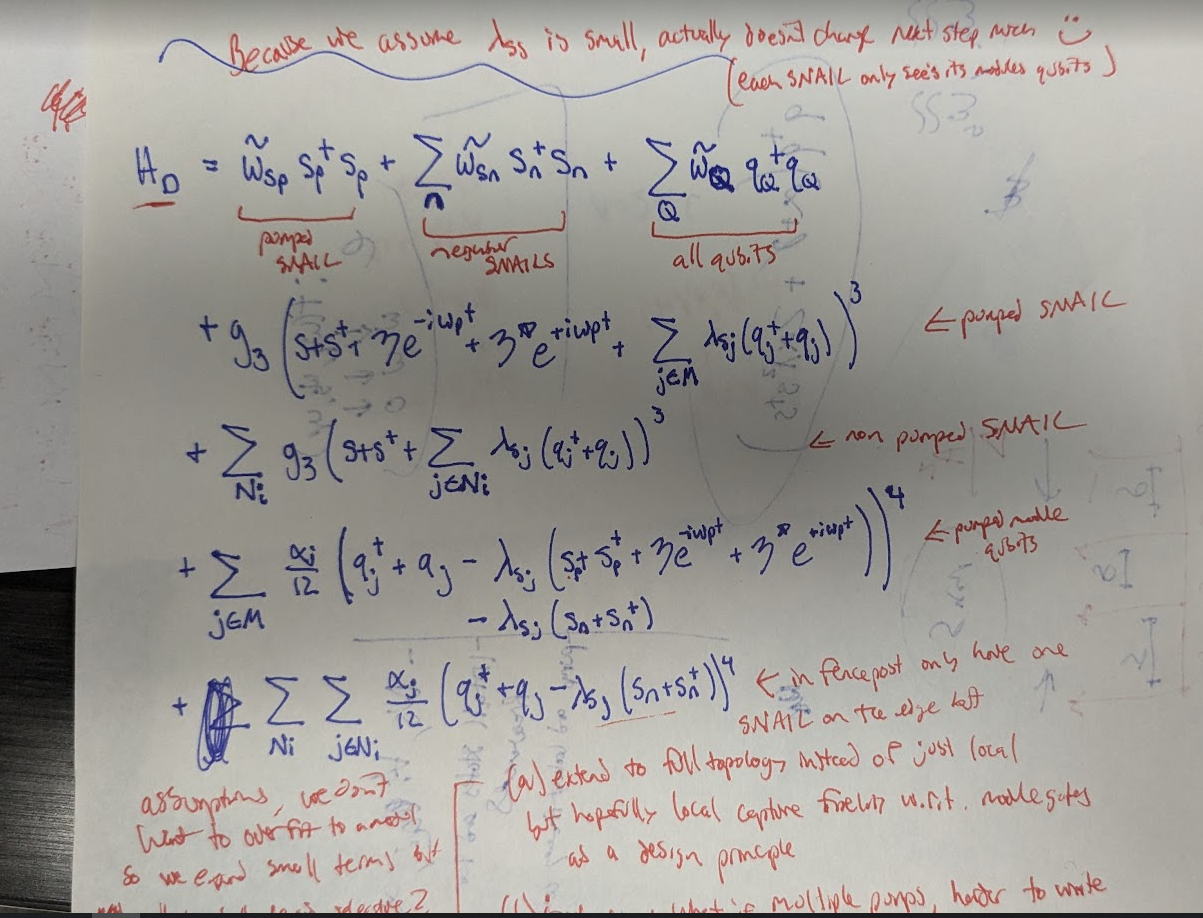